# Определение перспективного тарифа для телеком компании


## Описание проекта

## Описание тарифов

1. Тариф «Смарт»
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей
2. Тариф «Ультра»
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

## Шаг 1. Изучение общей информации

Изучим данные из предоставленных данных. Первым рассмотрим данные по тарифам.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import display
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv',index_col=0)
messages_data = pd.read_csv('/datasets/messages.csv')
def head_info(data):
    display(data.head(10))
    display(data.info())
head_info(tariffs_data)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Данные по таррифу представляют собой описанную в задании информацию, но записанную в табличной форме. Изучим данные по пользователям.

In [2]:
head_info(users_data)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Всего у нас в базе информация по пятистам пользователям.Данные по дате прекращения пользования тарифом пропущены по многим данным, но это не отклонения, а правильная информация, так как обозначает что пользователи не прекратили пользоваться тарифом на данный момент.

In [3]:
head_info(calls_data)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

In [4]:
 calls_data.query('duration!=0')['id'].count()

162994

In [5]:
 calls_data['duration'].sum()

1368790.0399999998

Исходя из таблицы со звонками мы видим, что ползователями за 2018 год совершено 202 607 звонков. Но, следует отметить, что многие из них нулевые, то есть скорей всего пропущенные. Длительностью больше 0 секунд было совершенно 162 994 звонков на 1 368 790 минут.

In [6]:
head_info(internet_data)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

In [7]:
internet_data['mb_used'].sum()

55305267.73

Выходов в интернет было меньше - всего 149396 сессии, в которых переданно 55 305 267.73 мегабайт данных.

In [8]:
head_info(messages_data)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Сообщений отправлено еще меньше - 123 036 штук.

### Вывод

Массив данных состоит из пяти таблиц по активности 500 пользователей,поделенных на 2 тарифных. Выявоенно, что только 38 пользователя отказалось от тарифа, остальные продолжают им пользоваться. Всего пользователями было совершено 202 607 звонков, из них 162 994 не пропущено. Их общая длительность составила 1 368 790 минут. В интернет пользователи выходили 149 396 раз, в которых переданно 55 305 267.73 мегабайт данных. Пользователями было отправленно 123 036 сообщений.

Описание таблиц:

1. Таблица tariffs (информация о тарифах):
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
2. Таблица users (информация о пользователях):
 - user_id — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана
3. Таблица calls (информация о звонках):
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок
4. Таблица messages (информация о сообщениях):
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение
5. Таблица internet (информация об интернет-сессиях):
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя


## Шаг 2. Подготовка и обработка данных

Рассмотрим поподробнее данные по каждой таблице. Среди звонков можно наблюдать огромное количество значений, равных нулю. Скорей всего, это пропущенные звонки,то есть по факту не совершенные и сброшенные, но которые в итоге значительно искозят нам статистику. 

Статистика по duration
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


Text(0.5, 0, 'Длительность, минут')

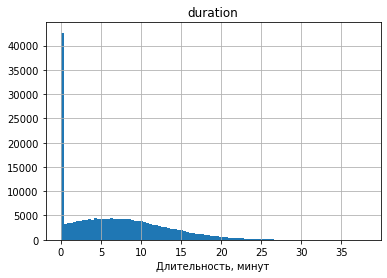

In [9]:
def info(data,column):
    data[column].hist(bins=100)
    print('Статистика по',column)
    print(data[column].describe())
    plt.title(column)
info(calls_data,'duration')
plt.xlabel('Длительность, минут')

Удалим все звонки с нулевыми значениями. Они никак не влияют ни на выручку, ни на использование пакета минут, но искажают данные. Кроме того, удалим все звонки длительностью более 25 минут- их мало относительно общего объема выборка, но они искажают наши данные. Кроме того, округлим данные в большую сторону по условиям тарифов. С удаленными отклонениями средняя продолжительность звонка выросла.

Добавим параллельный датафрейм, из которого не будем исключать выбросы. Он нам нужен для сопоставления анализа по выручке.

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Количество звонков длительностью более 25 минут - 678
Статистика по duration
count    162312.000000
mean          8.819021
std           5.222890
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          25.000000
Name: duration, dtype: float64


Text(0.5, 0, 'Длительность, минут')

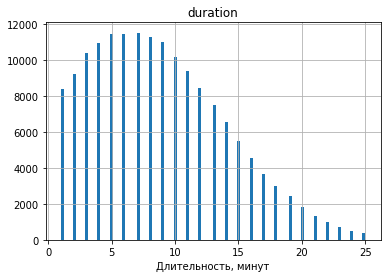

In [10]:
calls_data[calls_data['duration']==0]= calls_data[calls_data['duration']=='NaN']
print('Количество звонков длительностью более 25 минут -',calls_data.query('duration>25')['id'].count())
calls_data_full=calls_data.dropna()
calls_data=calls_data.dropna().query('duration<25')
calls_data_full['duration']=calls_data_full['duration'].apply(np.ceil).astype('int')
calls_data['duration']=calls_data['duration'].apply(np.ceil).astype('int')
info(calls_data,'duration')
plt.xlabel('Длительность, минут')

Для дальнейшего анализа переведем данные по дате в удобный формат и создадим дополнительный столбец с месяцами.
По графику видим, что сильно выбивается столбик примерно в районе 31 декабря. Учитывая, что в этот период люди обычно звонят и поздравляют всех с новым годом, данные не выглядят странными, просто отражают особенности поведения.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'День звонка')

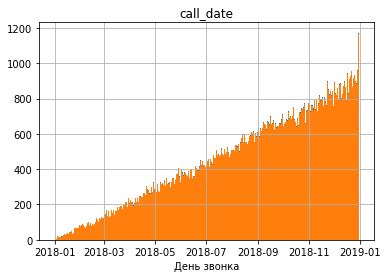

In [11]:
def month_info(data,column):
    data[column]= pd.to_datetime(data[column], format='%Y-%m-%d')
    data['month']=data[column].dt.month
    data[column].hist(bins=365)
    plt.title(column)
month_info(calls_data_full,'call_date')
month_info(calls_data,'call_date')
plt.xlabel('День звонка')

Если построить данные по кварталам, то видно, что количество звонков нарастает довольно равномерно.

Text(0.5, 0, 'Месяц звонка')

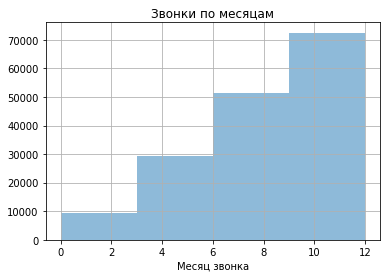

In [12]:
calls_data['month'].hist(bins=[0,3.01,6.01,9.01,12.01], alpha=0.5)
plt.title('Звонки по месяцам')
plt.xlabel('Месяц звонка')

Сгруппируем даные по пользователям, чтобы понять, сколько в среднем они совершают звонков за год.

Статистика по call_quantity
count     492.000000
mean      329.902439
std       234.073645
min         7.000000
25%       143.000000
50%       277.500000
75%       470.750000
max      1414.000000
Name: call_quantity, dtype: float64


Text(0.5, 0, 'Количество звонков')

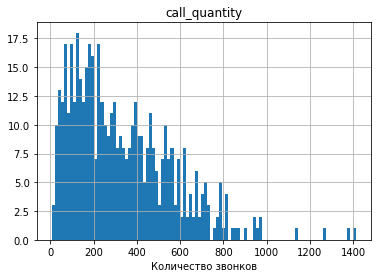

In [13]:
calls = calls_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
calls.columns=['call_quantity']
calls.sort_values(by='call_quantity',ascending=False)
info(calls,'call_quantity')
plt.xlabel('Количество звонков')

Основной массив пользователей совершает до 1000 звонков в год, удалим пользователей, лежащих за этими пределами. В среднем каждый пользователь совершает 322 звонка в год.

Статистика по call_quantity
count    488.000000
mean     321.956967
std      217.642220
min        7.000000
25%      142.750000
50%      276.500000
75%      466.250000
max      976.000000
Name: call_quantity, dtype: float64


Text(0.5, 0, 'Количество звонков')

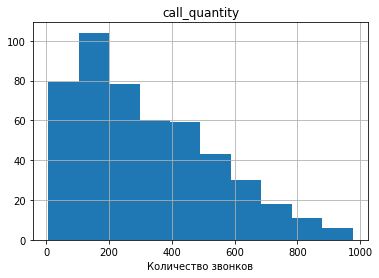

In [14]:
call_good_ids = calls.query('call_quantity < 1000')
call_good_data = calls_data.query('user_id in @call_good_ids.index ')
calls_good = call_good_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
calls_good.columns=['call_quantity']
def info_big(data,column):
    data.sort_values(by=column,ascending=False).hist(bins=10)
    print('Статистика по',column)
    print(data[column].describe())
info_big(calls_good,'call_quantity')
plt.xlabel('Количество звонков')

Посмотрим, сколько говорит по длительности каждый пользователь за год. В целом, график похож на предыдущий, что скорей всего связанно с зависимостью этих параметров. друг от друга.

Статистика по duration
count     488.000000
mean     2838.506148
std      1914.440973
min        66.000000
25%      1264.750000
50%      2442.500000
75%      4140.500000
max      8634.000000
Name: duration, dtype: float64


Text(0.5, 0, 'Длительность, минут')

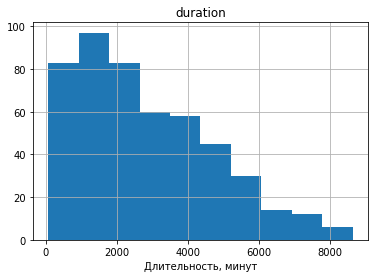

In [15]:
calls_duration = call_good_data.pivot_table(index=['user_id'],
                                      values='duration',
                                      aggfunc=('sum'))
info_big(calls_duration,'duration')
plt.xlabel('Длительность, минут')

Сгруппируем данные по месяцам для того, чтобы потом удобнее было объединять с данными по интернету и сообщениями. Проделаем ту же операцию с данными без отсеевания отклоняющихся значений

call_quantity  call_duration_total
user_id month                                    
1000.0  5                 17                  159
        6                 28                  172
        7                 41                  340
        8                 42                  408
        9                 46                  466
        10                44                  350
        11                37                  338
        12                38                  333
1001.0  11                45                  430
        12                47                  414

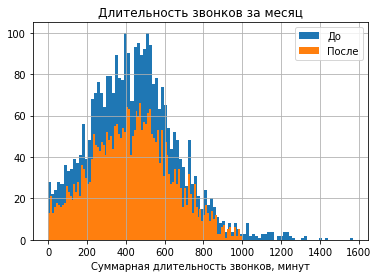

In [16]:
calls_month_full = calls_data_full.pivot_table(index=['user_id','month'],
                                      values='duration',
                                      aggfunc=('count','sum'))
calls_month_full.columns=['call_quantity','call_duration_total']
calls_month = call_good_data.pivot_table(index=['user_id','month'],
                                      values='duration',
                                      aggfunc=('count','sum'))
calls_month.columns=['call_quantity','call_duration_total']

calls_month['call_duration_total'].hist(bins=100, label='До')
calls_month=calls_month.query('call_duration_total< 1000')
calls_month['call_duration_total'].hist(bins=100, label='После')
plt.xlabel('Суммарная длительность звонков, минут')
plt.legend(loc='upper right')
plt.title('Длительность звонков за месяц')

calls_month.head(10)

Обработаем теперь данные по интернету. Столкнулись с такой же проблемой, как и в звонках - обилие "нулевых" выходов в интернет. Возможно это какие-либо случайные выходы в интернет, или неверное засчитывание начала сессии. Исправим это таким же методом, потому что выхода в интернет с нулевым использованием мегабайт быть не может.

Статистика по mb_used
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


Text(0.5, 0, 'Количество мегабайт')

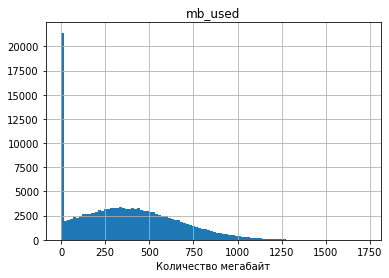

In [17]:
info(internet_data,'mb_used')
plt.xlabel('Количество мегабайт')

В данном случае кроме нулевых выходов уберем длинный хвост после 1100 МБ, чтобы уменьшить искажения. Кроме того, округлим значения по трафику до целого вверх по условиям тарифа. Создадим так же датафрейм со всеми значениями кроме нулевых

Количество сессий, в которые потрачено более 1100 МБ- 1252
Статистика по mb_used
count    128546.000000
mean        418.987320
std         244.722936
min           1.000000
25%         226.000000
50%         398.000000
75%         587.000000
max        1100.000000
Name: mb_used, dtype: float64


Text(0.5, 0, 'Количество мегабайт')

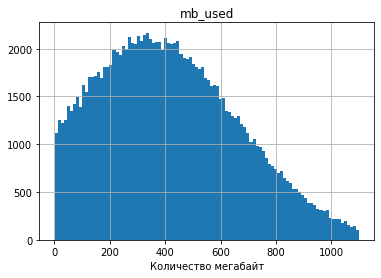

In [18]:
internet_data[internet_data['mb_used']==0]=internet_data[internet_data['mb_used']=='NaN']
print('Количество сессий, в которые потрачено более 1100 МБ-',internet_data.query('mb_used>1100')['id'].count())
internet_data_full=internet_data.dropna()
internet_data=internet_data.dropna().query('mb_used<1100')
internet_data_full['mb_used']=internet_data_full['mb_used'].apply(np.ceil).astype('int')
internet_data['mb_used']=internet_data['mb_used'].apply(np.ceil).astype('int')
info(internet_data,'mb_used')
plt.xlabel('Количество мегабайт')

По передаче данных значения очень похожи на то, что мы видели по звонкам. Опять крупный пик приходится на новый год.

Text(0.5, 0, 'Дата сессии')

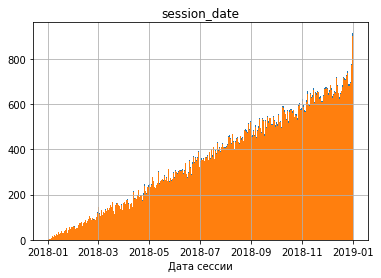

In [19]:
month_info(internet_data_full,'session_date')
month_info(internet_data,'session_date')
plt.xlabel('Дата сессии')

Text(0.5, 0, 'Месяц сессии')

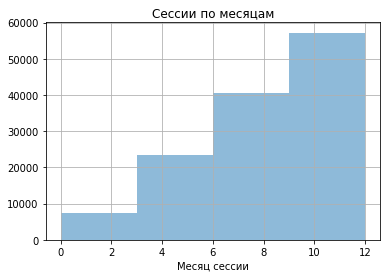

In [20]:
internet_data['month'].hist(bins=[0,3.01,6.01,9.01,12.01], alpha=0.5)
plt.title('Сессии по месяцам')
plt.xlabel('Месяц сессии')


Изучим информацию по количеству сессий на пользователя.

Статистика по session_quantity
count    497.000000
mean     258.643863
std      157.268134
min        8.000000
25%      130.000000
50%      237.000000
75%      358.000000
max      715.000000
Name: session_quantity, dtype: float64


Text(0.5, 0, 'Количество сессий')

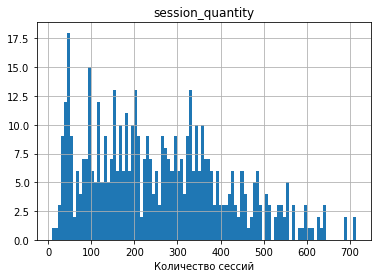

In [21]:
internet = internet_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
internet.columns=['session_quantity']
internet.sort_values(by='session_quantity',ascending=False)
info(internet,'session_quantity' )
plt.xlabel('Количество сессий')

В целом, выделяются только пользователи с количеством сессий больше 650. Уберем их из нашей статистики.

Статистика по session_quantity
count    493.000000
mean     255.048682
std      152.722161
min        8.000000
25%      130.000000
50%      235.000000
75%      355.000000
max      643.000000
Name: session_quantity, dtype: float64


Text(0.5, 0, 'Количество сессий')

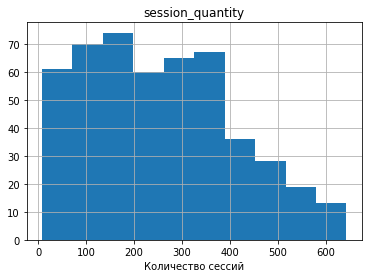

In [22]:
internet_good_ids = internet.query('session_quantity < 650')
internet_good_data = internet_data.query('user_id in @internet_good_ids.index ')
internet_good = internet_good_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
internet_good.columns=['session_quantity']
info_big(internet_good,'session_quantity' )
plt.xlabel('Количество сессий')

В среднем на одного пользователя приходится за год 255 сессии. Изучим количество мегабайтов, которое они при этом тратят.

Статистика по mb_used
count       493.000000
mean     106729.018256
std       65529.458341
min        4608.000000
25%       52940.000000
50%       98640.000000
75%      148109.000000
max      322800.000000
Name: mb_used, dtype: float64


Text(0.5, 0, 'Количество мегабайт')

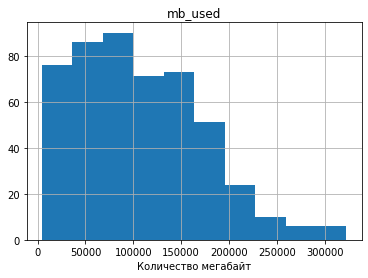

In [23]:
internet_mb = internet_good_data.pivot_table(index=['user_id'],
                                      values='mb_used',
                                      aggfunc=('sum'))
info_big(internet_mb ,'mb_used')
plt.xlabel('Количество мегабайт')

Данные по сумарному трафику не так похожи на данные по количеству сессий, как данные по сумарной длительности звонков и количество звонков, но в целом тенденции совпадают. Сгруппируем данные по месяцам.

session_quantity  mb_used_total
user_id month                                 
1000.0  5                     4           2256
        6                    43          22059
        7                    28          14016
        8                    27          14070
        9                    25          14581
        10                   27          14717
        11                   20          11046
        12                   19           9827
1001.0  11                   47          18452
        12                   35          14053

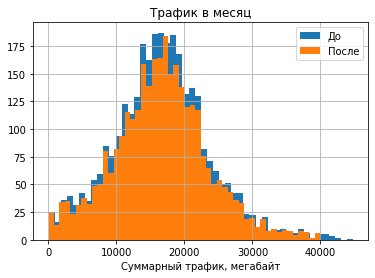

In [24]:
internet_month_full = internet_data_full.pivot_table(index=['user_id','month'],
                                      values='mb_used',
                                      aggfunc=('count','sum'))
internet_month_full.columns=['session_quantity','mb_used_total']
internet_month = internet_good_data.pivot_table(index=['user_id','month'],
                                      values='mb_used',
                                      aggfunc=('count','sum'))
internet_month.columns=['session_quantity','mb_used_total']

internet_month['mb_used_total'].hist(bins=50, label='До')
internet_month=internet_month.query('mb_used_total<40000')
internet_month['mb_used_total'].hist(bins=50, label='После')
plt.xlabel('Суммарный трафик, мегабайт')
plt.legend(loc='upper right')
plt.title('Трафик в месяц')
internet_month.head(10)

Рассмотрим данные по сообщениям. У них нет дополнительных параметров, кроме даты. Поэтому рассмотрим сначала её. Опять всплекс в районе 31 декабря, продолжение общей тенденции.

Text(0.5, 0, 'Количество сообщений')

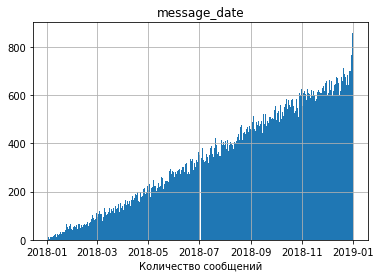

In [25]:
month_info(messages_data,'message_date')
plt.xlabel('Количество сообщений')

Text(0.5, 0, 'Месяц сообщения')

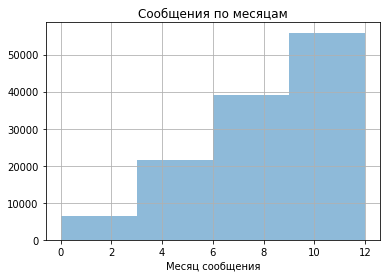

In [26]:
messages_data['month'].hist(bins=[0,3.01,6.01,9.01,12.01], alpha=0.5)
plt.title('Сообщения по месяцам')
plt.xlabel('Месяц сообщения')

Рассмотрим количество сообщений, приходящееся на каждого пользователя

Статистика по message_quantity
count     426.000000
mean      288.816901
std       267.607552
min         1.000000
25%        85.750000
50%       215.500000
75%       414.000000
max      1463.000000
Name: message_quantity, dtype: float64


Text(0.5, 0, 'Количество сообщений')

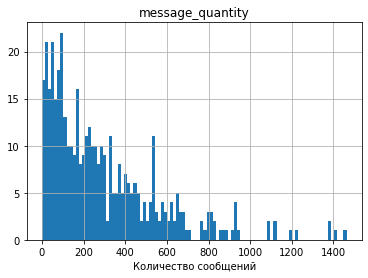

In [27]:
messages = messages_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
messages.columns=['message_quantity']
messages.sort_values(by='message_quantity',ascending=False)
info(messages,'message_quantity' )
plt.xlabel('Количество сообщений')

Убираем из дальнейшего анализа гиперактивных пользователей, которые шлют больше 1000 сообщений за год.

Статистика по session_quantity
count    416.000000
mean     265.766827
std      224.025001
min        1.000000
25%       84.000000
50%      208.500000
75%      396.750000
max      944.000000
Name: session_quantity, dtype: float64


Text(0.5, 0, 'Количество сообщений')

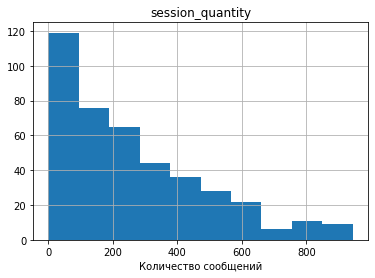

In [28]:
messages_good_ids = messages.query('message_quantity < 1000')
messages_good_data = messages_data.query('user_id in @messages_good_ids.index ')
messages_good = messages_good_data.pivot_table(index=['user_id'],
                                      values='id',
                                      aggfunc=('count'))
messages_good.columns=['session_quantity']
info_big(messages_good,'session_quantity' )
plt.xlabel('Количество сообщений')

Группируем по месяцам для дальнейшего анализа.

message_total
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

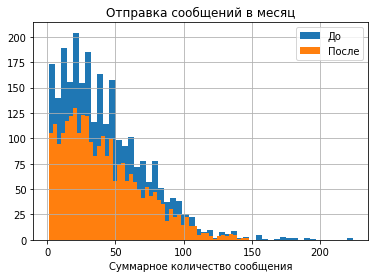

In [29]:
messages_month_full = messages_data.pivot_table(index=['user_id','month'],
                                      values='id',
                                      aggfunc='count')
messages_month_full.columns=['message_total']
messages_month = messages_good_data.pivot_table(index=['user_id','month'],
                                      values='id',
                                      aggfunc='count')
messages_month.columns=['message_total']
messages_month['message_total'].hist(bins=50, label='До')
messages_month=messages_month.query('message_total<150')
messages_month['message_total'].hist(bins=50, label='После')
plt.xlabel('Суммарное количество сообщений')
plt.legend(loc='upper right')
plt.title('Отправка сообщений в месяц')
messages_month.head(10)


Соединим таблицы по месяцам используя метод join.

In [30]:
calls_internet=calls_month.join(internet_month,on=['user_id','month'],how='outer')
calls_internet_messages=calls_internet.join(messages_month,on=['user_id','month'],how='outer')
calls_internet_full=calls_month_full.join(internet_month_full,on=['user_id','month'],how='outer')
calls_internet_messages_full=calls_internet_full.join(messages_month_full,on=['user_id','month'],how='outer')
calls_internet_messages.head()

call_quantity  call_duration_total  session_quantity  \
user_id month                                                         
1000.0  5               17.0                159.0               4.0   
        6               28.0                172.0              43.0   
        7               41.0                340.0              28.0   
        8               42.0                408.0              27.0   
        9               46.0                466.0              25.0   

               mb_used_total  message_total  
user_id month                                
1000.0  5             2256.0           22.0  
        6            22059.0           60.0  
        7            14016.0           75.0  
        8            14070.0           81.0  
        9            14581.0           57.0

Чтобы работать с полученной таблицей дальше, нам нужно изучить данные по пользователям в целом. Для начала узнаем, каким был первый месяц, в течение которого пользователь использовал тариф полностью. Необходимо это для того, чтобы выделить группу данных, пригодных для сравнения. А сравнивать поведение пользователя, использовавшего тариф всего пять дней с пользователем, который использовал тариф все 30 дней, лишенно смысла и может исказить результаты.
Для этого у пользователей, которые подключились к тарифу не 1 числа, значение месяца регистрации округлим вверх.

In [31]:
users_data['reg_date']= pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['reg_month']=users_data['reg_date'].dt.month
users_data['reg_day']=users_data['reg_date'].dt.day
def month_round(data):
    day=data['reg_day']
    month=data['reg_month']
    if day !=1:
        return month+1
    else:
        return month
users_data['reg_month']=users_data.apply(month_round,axis=1)
users_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,reg_day
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,25
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,1
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7,17
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,9,17
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,6,14
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2,25
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,3,26
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,5,19
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,13,19
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,4,22


По этой же причине округлим данные по пользователям, которые отказались от использования тарифа. Но, здесь мы не будем учитвать месяца, где пользователь отключился ранее последнего дня месяца - 30 или 31 числа соответственно.

In [32]:
users_data['churn_date'].unique()
users_data['churn_date']= pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['churn_month']=users_data['churn_date'].dt.month
users_data['churn_day']=users_data['churn_date'].dt.day
def month_churn_round(data):
    day=data['churn_day']
    month=data['churn_month']
    if day >=30 and month !=12:
        return month
    else:
        return month-1
users_data['churn_month']=users_data.apply(month_churn_round,axis=1)
users_data=users_data.set_index('user_id')
users_data.query('churn_day>28')

,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,reg_day,churn_month,churn_day
user_id,,,,,,,,,,,
1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2,9,8.0,31.0
1232,60,2018-11-30,Томск,Виктория,Ларина,2018-10-07,smart,11,7,11.0,30.0
1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,13,25,11.0,30.0


In [33]:
users_data=users_data.drop(columns= ['reg_day','churn_day'])

Чтобы объединенить данные по пользователям с информацией по использованию тарифов, необходимо сбросить мультииндекс, включающий месяц.

In [34]:
calls_internet_messages.reset_index(level='month',inplace=True)
calls_internet_messages_full.reset_index(level='month',inplace=True)
calls_internet_messages.head()

,month,call_quantity,call_duration_total,session_quantity,mb_used_total,message_total
user_id,,,,,,
1000.0,5,17.0,159.0,4.0,2256.0,22.0
1000.0,6,28.0,172.0,43.0,22059.0,60.0
1000.0,7,41.0,340.0,28.0,14016.0,75.0
1000.0,8,42.0,408.0,27.0,14070.0,81.0
1000.0,9,46.0,466.0,25.0,14581.0,57.0


Добавим отдельные колонки к таблице, которые нас интересуют для дальнейшего анализа, а именно - месяц регистрации, месяц конца использования тарифа, тариф и город пользователя.

In [35]:
column_to_join=['reg_month','churn_month','tariff','city']
for column in column_to_join:
    calls_internet_messages[column]=users_data[column]
    calls_internet_messages_full[column]=users_data[column]
calls_internet_messages.reset_index(inplace=True)
calls_internet_messages_full.reset_index(inplace=True)
calls_internet_messages.head()

,user_id,month,call_quantity,call_duration_total,session_quantity,mb_used_total,message_total,reg_month,churn_month,tariff,city
0,1000.0,5,17.0,159.0,4.0,2256.0,22.0,6,NaN,ultra,Краснодар
1,1000.0,6,28.0,172.0,43.0,22059.0,60.0,6,NaN,ultra,Краснодар
2,1000.0,7,41.0,340.0,28.0,14016.0,75.0,6,NaN,ultra,Краснодар
3,1000.0,8,42.0,408.0,27.0,14070.0,81.0,6,NaN,ultra,Краснодар
4,1000.0,9,46.0,466.0,25.0,14581.0,57.0,6,NaN,ultra,Краснодар


Теперь добавим информацию о том, будем использовать мы данные по месяцу в дальнейшем анализе, или нет. Для этого сравним номер месяца с номерами первого и последнего полного месяцев пользователя.

In [36]:
calls_internet_messages['churn_month']=calls_internet_messages['churn_month'].fillna(12)
def month_for_analysys(data):
    month=data['month']
    reg=data['reg_month']
    churn=data['churn_month']
    if reg<=month<=churn:
        return month
    else:
        return 'NaN'
calls_internet_messages['full_month']=calls_internet_messages.apply(month_for_analysys,axis=1)
calls_internet_messages=calls_internet_messages.drop(columns= ['reg_month','churn_month'])
calls_internet_messages.head()

,user_id,month,call_quantity,call_duration_total,session_quantity,mb_used_total,message_total,tariff,city,full_month
0,1000.0,5,17.0,159.0,4.0,2256.0,22.0,ultra,Краснодар,NaN
1,1000.0,6,28.0,172.0,43.0,22059.0,60.0,ultra,Краснодар,6
2,1000.0,7,41.0,340.0,28.0,14016.0,75.0,ultra,Краснодар,7
3,1000.0,8,42.0,408.0,27.0,14070.0,81.0,ultra,Краснодар,8
4,1000.0,9,46.0,466.0,25.0,14581.0,57.0,ultra,Краснодар,9


Посчитаем информацию по выручки с каждого пользователя по месяцам. Для этого сложим данные по плате за тариф с платой за использование превышающих тариф использованных минутах, мегабайтах и сообщениях.

In [37]:
def money_spent(row):
    tariff=row['tariff']
    if tariff=='ultra':
        i=1
    else:
        i=0
    fee=tariffs_data.loc[i,'rub_monthly_fee']
    minutes=row['call_duration_total']
    minutes_included=tariffs_data.loc[i,'minutes_included']
    minutes_cost=tariffs_data.loc[i,'rub_per_minute']
    mb=row['mb_used_total']
    mb_included=tariffs_data.loc[i,'mb_per_month_included']
    mb_cost=tariffs_data.loc[i,'rub_per_gb']/1024
    messages=row['message_total']
    messages_included=tariffs_data.loc[i,'messages_included']
    messages_cost=tariffs_data.loc[i,'rub_per_message']
    try:
        if minutes > minutes_included:
            minute_bonus=(minutes_cost*(minutes-minutes_included))
        else:
            minute_bonus=0
    except:
        minut_bonus=0
    try:
        if mb > mb_included:
            mb_bonus=(mb_cost*(mb-mb_included))
        else:
            mb_bonus=0
    except:
        mb_bonus=0
    try:
        if messages > messages_included:
            message_bonus=(messages_cost*(messages-messages_included))
        else:
            message_bonus=0
    except:
        message_bonus=0
    spent=round(fee+minute_bonus+mb_bonus+message_bonus,2)
    return spent
calls_internet_messages['spent']=calls_internet_messages.apply(money_spent,axis=1)
calls_internet_messages_full['spent']=calls_internet_messages_full.apply(money_spent,axis=1)
calls_internet_messages.head(20)

,user_id,month,call_quantity,call_duration_total,session_quantity,mb_used_total,message_total,tariff,city,full_month,spent
0,1000.0,5,17.0,159.0,4.0,2256.0,22.0,ultra,Краснодар,NaN,1950.00
1,1000.0,6,28.0,172.0,43.0,22059.0,60.0,ultra,Краснодар,6,1950.00
2,1000.0,7,41.0,340.0,28.0,14016.0,75.0,ultra,Краснодар,7,1950.00
3,1000.0,8,42.0,408.0,27.0,14070.0,81.0,ultra,Краснодар,8,1950.00
4,1000.0,9,46.0,466.0,25.0,14581.0,57.0,ultra,Краснодар,9,1950.00
5,1000.0,10,44.0,350.0,27.0,14717.0,73.0,ultra,Краснодар,10,1950.00
6,1000.0,11,37.0,338.0,20.0,11046.0,58.0,ultra,Краснодар,11,1950.00
7,1000.0,12,38.0,333.0,19.0,9827.0,70.0,ultra,Краснодар,12,1950.00
8,1001.0,11,45.0,430.0,47.0,18452.0,NaN,smart,Москва,11,1153.91
9,1001.0,12,47.0,414.0,35.0,14053.0,NaN,smart,Москва,12,550.00


Посмотрим, насколько встрачаются разбросы в данных по выручке. Два пика сосредоточены в районе абонементской платы за тариф. Основное количество пользователей тратит не более 3000 рублей в месяц.

Text(0.5, 1.0, 'Выручка за месяц, в рублях')

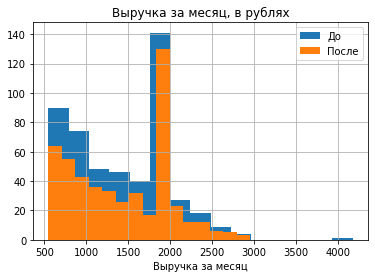

In [38]:
spent_data =calls_internet_messages.pivot_table(index=['user_id'],
                                      values='spent',
                                      aggfunc=('mean'))
spent_data['spent'].hist(bins=15, label='До')
spent_data=spent_data.query('spent< 3000')
spent_data['spent'].hist(bins=15, label='После')
plt.xlabel('Выручка за месяц')
plt.legend(loc='upper right')
plt.title('Выручка за месяц, в рублях')


Исключим данные по неполным месяцам и по слишком большим тратам за тариф. 

In [50]:
good_total_data=calls_internet_messages.query('full_month!="NaN" and spent<3000')
good_total_data=good_total_data.drop(columns= ['full_month'])
good_total_data['user_id']=good_total_data['user_id'].astype('int')
good_total_data['spent']=good_total_data['spent'].astype('int')
calls_internet_messages_full['user_id']=calls_internet_messages_full['user_id'].astype('int')
calls_internet_messages_full['spent']=calls_internet_messages_full['spent'].astype('int')
good_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 1 to 3212
Data columns (total 10 columns):
user_id                2629 non-null int64
month                  2629 non-null int64
call_quantity          2497 non-null float64
call_duration_total    2497 non-null float64
session_quantity       2568 non-null float64
mb_used_total          2568 non-null float64
message_total          2132 non-null float64
tariff                 2629 non-null object
city                   2629 non-null object
spent                  2629 non-null int64
dtypes: float64(5), int64(3), object(2)
memory usage: 225.9+ KB


### Вывод

На этом шаге были подготовленны данные для дальнейшего анализа. Удалены нулевые значения по длительности звонков и сессий в интернете. Изучены пропуски, принято решение их оставить для облегчения дальнейшего анализа, так в большинстве случаев они связаны либо с отсутствием использования услуги, либо с выбивающимися значениями. Для изучения выручки оба варианта нам не интересны. Удалены значения по количеству сессий, звонков и сообщений, длительности звонков и потраченного трафика, а так же по выручке, которые слишком отличаются от основной вариации. Составлена единная таблица, где можно узнать основную информацию по пользователям в разрезе по полным месяцам, которые пользователь использовал тариф. Посчитана средняя выручка по месяцам. 


## Шаг 3. Анализ данных

Разделим данные по тарифам на два дата-сета.

In [51]:
smart_data=(good_total_data
            .query('tariff=="smart"')
            .pivot_table(index=['user_id'], 
                        columns=None, 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
                                 )
ultra_data=(good_total_data
            .query('tariff=="ultra"')
            .pivot_table(index=['user_id'], 
                        columns=None, 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
                                 )


Опишем поведение пользователей по двум выборкам. Для начала рассмотрим сколько в среднем минут по телефону разговаривают пользователи разных тарифов.

Суммарная длительность звонков за месяц на одного пользователя

Тариф "Смарт"
Среднее значение - 450.09
Дисперсия - 23524.64
Стандартное отклонение- 153.38

Тариф "Ультра"
Среднее значение - 534.1
Дисперсия - 55877.12
Стандартное отклонение- 236.38



Text(0.5, 1.0, 'Длительность звонков за месяц')

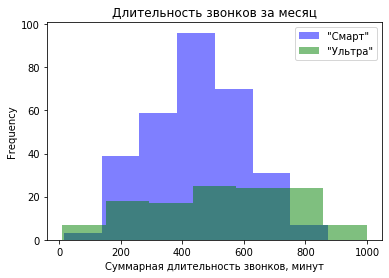

In [57]:
def varaities_info(column,name):
    data_list=[smart_data,ultra_data]
    i=0
    print(name)
    print()
    for data_name in data_list:
        if i==0:
            tariff_name='"Смарт"'
            color='blue'
        else:
            tariff_name='"Ультра"'
            color='green'
        print("Тариф",tariff_name)
        
        print("Среднее значение -", round(data_name[column].mean(),2))
        print("Дисперсия -", round(np.var(data_name[column], ddof=1),2))
        print("Стандартное отклонение-",round(np.std(data_name[column], ddof=1),2))
        data_name[column].plot(kind='hist', bins=7, facecolor=color, alpha=0.5, label=tariff_name)
        plt.legend(loc='upper right')
        print()
        i=+1
varaities_info('call_duration_total','Суммарная длительность звонков за месяц на одного пользователя')       
plt.xlabel('Суммарная длительность звонков, минут')
plt.title('Длительность звонков за месяц')

Средние значения использованных минут по пользователям разных тарифов довольно сильно отличаются. Пользователи тарифом "Смарт" тратят в среднем на 84 минуты меньше на разговоры, чем пользователи тарифа "Ультра". При этом стандартное отклонение у тарифа "Ультра" также значительно больше. Поэтому на графике мы можем увидеть, что график по пользователям тарифа "Смарт"(голубой) больше похож на нормальное распределение, чем график по пользователям тарифа "Ультра", который имеет перекос в левую сторону и сильно "сплюснут". Это говорит скорей всего о том, что пользователи тарифа "Ультра" менее однородны как сегмент, и выбирают тариф не из соображения своего пользовательского поведения, а по иным факторам. Или, наоборот, что пользователи тарифа "Смарт" корректируют свои нужды в соответствии с нуждами более жесткого тпо условиям тарифа.

Рассмотрим данные по использованию интернет-трафика.

Суммарный интернет-трафик за месяц на одного пользователя

Тариф "Смарт"
Среднее значение - 17165.15
Дисперсия - 13704728.58
Стандартное отклонение- 3701.99

Тариф "Ультра"
Среднее значение - 20295.47
Дисперсия - 65810320.26
Стандартное отклонение- 8112.36



Text(0.5, 1.0, 'Трафик в месяц')

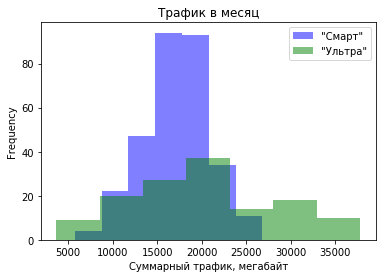

In [59]:
varaities_info('mb_used_total','Суммарный интернет-трафик за месяц на одного пользователя')
plt.xlabel('Суммарный трафик, мегабайт')
plt.title('Трафик в месяц')

Средние значения использованных трафика по пользователям разных тарифов так же сильно отличаются. Пользователи тарифом "Смарт" тратят в среднем на около 3 ГБ меньше, чем пользователи тарифа "Ультра". При этом стандартное отклонение у тарифа "Ультра" также значительно больше. Поэтому на графике мы можем увидеть, что график по пользователям тарифа "Смарт"(голубой) больше похож на нормальное распределение, чем график по пользователям тарифа "Ультра", который имеет перекос в левую сторону и сильно "сплюснут". В отличие от звонков, у использования интернета пользователями тарифа "Ультра" легче выдить модальное поведение, которое распологается в районе 20 ГБ в месяц.

Изучим данные по количеству сообщений.

Суммарное количество сообщений за месяц на одного пользователя

Тариф "Смарт"
Среднее значение - 41.12
Дисперсия - 731.6
Стандартное отклонение- 27.05

Тариф "Ультра"
Среднее значение - 60.34
Дисперсия - 1348.23
Стандартное отклонение- 36.72



Text(0.5, 1.0, 'Отправка сообщений в месяц')

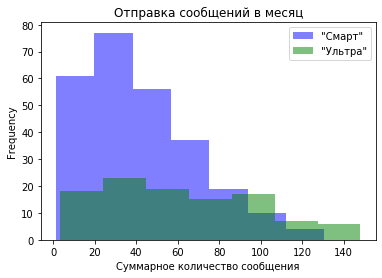

In [58]:
varaities_info('message_total','Суммарное количество сообщений за месяц на одного пользователя')
plt.xlabel('Суммарное количество сообщений')
plt.title('Отправка сообщений в месяц')

В случае с сообщениями, средние значения по количеству различается почти в полтора раза - 41 сообщение по тарифу "Смарт" и 60 сообщений по тарифу "Ультра". Такие же различия и в стандартном отклонении. Стоит отметить, что достаточно строгие ограничения по тарифу влияют на пользователей тарифа "Смарт" дали значительный скос в правую сторону и распределине перестало быть похоже на нормальное, и стало больше похоже на распределение Пуассона. Что касается пользователей тарифом "Ультра", у них наблюдается такое же неярко выраженное распределение, как и в звонках. 

In [74]:
pivot_for_mean=good_total_data.pivot_table(index=['user_id','tariff'], 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
pivot_for_mean.reset_index(inplace=True)
def var_ddof1(x): 
    return np.var(x, ddof=1)
pivot_for_mean.pivot_table(index='tariff',
                                  values=['call_duration_total', 'mb_used_total', 'message_total'],
                                  aggfunc=[np.mean, var_ddof1, np.std])

mean                                       var_ddof1  \
       call_duration_total mb_used_total message_total call_duration_total   
tariff                                                                       
smart           450.091965  17165.146401     41.115164        23524.641954   
ultra           534.097653  20295.465381     60.336049        55877.116171   

                                                   std                \
       mb_used_total message_total call_duration_total mb_used_total   
tariff                                                                 
smart   1.370473e+07    731.595474          153.377449   3701.989813   
ultra   6.581032e+07   1348.233456          236.383409   8112.356024   

                      
       message_total  
tariff                
smart      27.048022  
ultra      36.718299

Изучим данные по выручке.

Суммарная выручка за месяц на одного пользователя

Тариф "Смарт"
Среднее значение - 1251.45
Дисперсия - 278018.04
Стандартное отклонение- 527.27

Тариф "Ультра"
Среднее значение - 2019.06
Дисперсия - 38943.25
Стандартное отклонение- 197.34



Text(0.5, 1.0, 'Выручка в месяц')

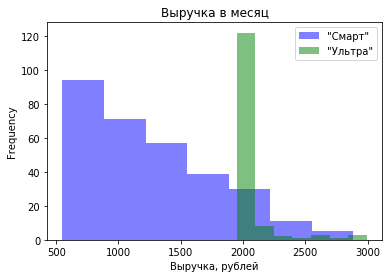

In [60]:
varaities_info('spent','Суммарная выручка за месяц на одного пользователя')
plt.xlabel('Выручка, рублей')
plt.title('Выручка в месяц')

Здесь данные ведут себя совершенно иначе. Если плата за тариф различается почти в 4 раза, то средние по итоговой выручке отличаются меньше, чем в 2 раза. При этом стандартное отклонение у пользователей тарифа "Смарт" значительно выше, чем у мпользователей тарифа "Ултра". По графику тоже хорошо видно, что основное количество пользователей тарифа "Ультра" платят только за тариф, в то время как пользователи тарифа "Смарт" могут иногда даже платить больше, чем пользователи тарифа "Ультра" 

In [61]:
print('Выручка по пользователям тарифа "Смарт"',calls_internet_messages_full[calls_internet_messages_full['tariff']=='smart']['spent'].sum().round(2))
print('Выручка по пользователям тарифа "Ультра"',calls_internet_messages_full[calls_internet_messages_full['tariff']=='ultra']['spent'].sum().round(2))

Выручка по пользователям тарифа "Смарт" 2748486
Выручка по пользователям тарифа "Ультра" 2029557


Суммарная выручка за месяц на одного пользователя

Тариф "Смарт"
Среднее значение - 1266.64
Дисперсия - 345367.92
Стандартное отклонение- 587.68

Тариф "Ультра"
Среднее значение - 2076.18
Дисперсия - 78758.26
Стандартное отклонение- 280.64



Text(0.5, 1.0, 'Выручка в месяц')

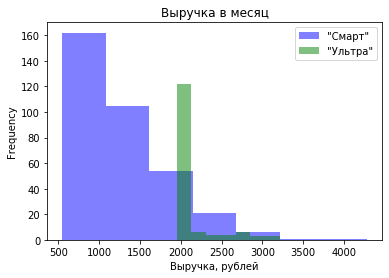

In [62]:
smart_data_full=(calls_internet_messages_full
            .query('tariff=="smart"')
            .pivot_table(index=['user_id'], 
                        columns=None, 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
                                 )
ultra_data_full=(calls_internet_messages_full
            .query('tariff=="ultra"')
            .pivot_table(index=['user_id'], 
                        columns=None, 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
                                 )
def varaities_info_full(column,name):
    data_list=[smart_data_full,ultra_data_full]
    i=0
    print(name)
    print()
    for data_name in data_list:
        if i==0:
            tariff_name='"Смарт"'
            color='blue'
        else:
            tariff_name='"Ультра"'
            color='green'
        print("Тариф",tariff_name)
        
        print("Среднее значение -", round(data_name[column].mean(),2))
        print("Дисперсия -", round(np.var(data_name[column], ddof=1),2))
        print("Стандартное отклонение-",round(np.std(data_name[column], ddof=1),2))
        data_name[column].plot(kind='hist', bins=7, facecolor=color, alpha=0.5, label=tariff_name)
        plt.legend(loc='upper right')
        print()
        i=+1
varaities_info_full('spent','Суммарная выручка за месяц на одного пользователя')
plt.xlabel('Выручка, рублей')
plt.title('Выручка в месяц')

И, можно предположить, что тариф "Ультра" приносит большую среднюю выручку, поэтому надо сосредоточится на нём. Но если посчитать сумарную выручку, то тариф "Смарт" приносит значительно больше денег компании. 

### Вывод

При изучении количества потраченных минут, мегабайтов и сообщений выявлены различия между пользователями разных тарифов. Так, среди пользователей тарифом "Ультра" наблюдается распределние, близкое к нормальному, по длительности звонков и трафику интернета. При этом ограничение по сообщениям слишком жесткое, и укладываться в него пользователям сложнее. У пользователей тарифа "Ультра", наоборот, слишком лояльные условия. Максимум по минутам и сообщениям никто не набирает, при этом интернет-трафика им не всем хватает.

## Шаг 4. Проверка гипотез

Проверим различия в выручке между пользователями по двум тарифам и между пользователями из Москвы и регионов.

Но: средние по выручке двух выборок по тарифам равны между собой
Н1: средние по выручке двух выборок по тарифам не равны между собой

In [46]:
alpha = .05
results =  st.ttest_ind(smart_data['spent'],ultra_data['spent'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.995868923514512e-49
Отвергаем нулевую гипотезу


Но: средние по выручке двух выборок по Москве и регионам равны между собой
Н1: средние по выручке двух выборок по Москве и регионам не равны между собой

p-значение: 0.6418715749211665
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0.5, 1.0, 'Выручка в месяц')

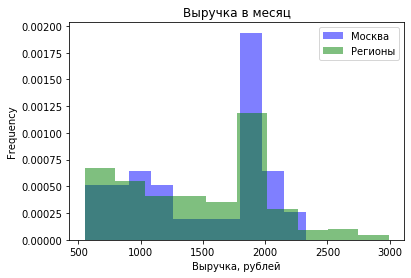

In [63]:
moscow_spent=(good_total_data
              .query('city=="Москва"')
              .pivot_table(index=['user_id'], 
                           columns=None, 
                           aggfunc={'spent':'mean'})
                        )
region_spent=(good_total_data
              .query('city!="Москва"')
              .pivot_table(index=['user_id'], 
                           columns=None, 
                           aggfunc={'spent':'mean'})
                        )
moscow_spent['spent'].plot(kind='hist', bins=10, normed=1, facecolor='blue', alpha=0.5, label="Москва")
region_spent['spent'].plot(kind='hist', bins=10, normed=1, facecolor='green', alpha=0.5, label="Регионы")
plt.legend(loc='upper right')
results =  st.ttest_ind(moscow_spent['spent'],region_spent['spent'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print ("Отвергаем нулевую гипотезу")
else:
    print ("Не получилось отвергнуть нулевую гипотезу")
plt.xlabel('Выручка, рублей')
plt.title('Выручка в месяц')

In [73]:
pivot_for_mean=good_total_data.pivot_table(index=['user_id','tariff'], 
                        aggfunc={'call_duration_total':'mean'
                                 ,'mb_used_total':'mean'
                                 ,'message_total':'mean'
                                 ,'spent':'mean'})
pivot_for_mean.reset_index(inplace=True)
def var_ddof1(x): 
    return np.var(x, ddof=1)
pivot_for_mean.pivot_table(index='tariff',
                                  values=['call_duration_total', 'mb_used_total', 'message_total'],
                                  aggfunc=[np.mean, var_ddof1, np.std])

mean                                       var_ddof1  \
       call_duration_total mb_used_total message_total call_duration_total   
tariff                                                                       
smart           450.091965  17165.146401     41.115164        23524.641954   
ultra           534.097653  20295.465381     60.336049        55877.116171   

                                                   std                \
       mb_used_total message_total call_duration_total mb_used_total   
tariff                                                                 
smart   1.370473e+07    731.595474          153.377449   3701.989813   
ultra   6.581032e+07   1348.233456          236.383409   8112.356024   

                      
       message_total  
tariff                
smart      27.048022  
ultra      36.718299

## Вывод

В аналитической работе было изучено поведение клиентов двух тарифов. В рамках тарифа "Смарт" клиенты склоны экономить и стараются придерживаться ограничений тарифа. Они звонят в среднем 450 минут, исползуют  17 ГБ трафика (что больше, чем ограничения тарифа) и посылают около 41 сообщений в месяц. При этом клиенты приносят в среднем 1251.45 рублей в месяц. Это более чем в два раза больше тарифной платы. Некоторые из них в итоге платят больше, чем клиенты тарифа "Ультра". Клиенты тарифа "Ультра", наоборот, часто недоиспользуют возможности тарифа, особенно это касается количество звонков и сообщений. В среднем, они разговаривают 534 минуты, используют 20 ГБ мобильного интернета и отправляют 60 сообщений. В среднем тратят 2019 рублей в месяц. Различие в тратах между клиентами тарифов статистически значимо. При этом различие в тратах между Москвой и регионами подтвердить не удалось. Тариф "Ультра" по результатам анализа приносит компании больше денег на одного клиента, но при этом это не значит, что следует отказываться от тарифа "Смарт". Если брать суммарную выручку, то тариф "Смарт" показывает лучшие результаты -  2,7 млн. рублей против 2 млн. Связанно это с тем, что на тарифе "Смарт" больше клиентов. Поэтому ответ о том, какой тариф для компании лучше нельзя дать однозначно не зная целей. Без привязки к целям тарифы существуют каждый для своего сегмента потребителей, и отказываться ни от одного из них не рекомендуется, хотя их модификации возможны.